In [ ]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# CitiBike Trip Analysis 

## Loading the required packages for the project

In [9]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the code in all paragraphs."></form>''')


In [1]:
#To match the specific strings we use re package using regular expressions
import re
#To modify os related directories
import os
#To Retreive information from url
from urllib.request import urlretrieve
#To unzip a zip file 
import zipfile
#To connect to my sql
import mysql.connector as sql
#To connect to mysql from python
import mysql
#To store data from the mysql server as a pandas dataframe and performing some manipulations
import pandas as pd
#To perform date operations
import datetime
import csv

import seaborn as sns
#Importing matplotlib to create plots
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [78]:
#Function to create a monthdelta method which returns the latest 20 months
def monthdelta(date, delta):
    m, y = (date.month+delta) % 12, date.year + ((date.month)+delta-1) // 12
    if not m: m = 12
    d = min(date.day, [31,29 if y%4==0 and not y%400==0 else 28,31,30,31,30,31,31,30,31,30,31][m-1])
    return date.replace(day=d,month=m, year=y)

link = []
link = "..............................."

## Retrieving the datafiles from internet

In [77]:
dir_name = '.....................................'
os.chdir(dir_name) # change directory from working dir to dir with files


# Split on the rightmost / and take everything on the right side of that as the name of the file
name = 'citibike.csv'

# Combine the name and the downloads directory to get the local filename
filename = os.path.join(dir_name, name)

# Download the file if it does not exist
if not os.path.isfile(filename):
    urlretrieve(link,filename)
print(filename)
    

/Users/danishkhan/Documents/citibike.csv


In [4]:
df = pd.read_csv(filename)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1314,2017-08-01 00:03:05,2017-08-01 00:24:59,3187,Warren St,40.721124,-74.038051,3210,Pershing Field,40.742677,-74.051789,26293,Subscriber,1968.0,1
1,221,2017-08-01 00:06:25,2017-08-01 00:10:06,3213,Van Vorst Park,40.718489,-74.047727,3209,Brunswick St,40.724176,-74.050656,26314,Subscriber,1968.0,2
2,185,2017-08-01 00:42:28,2017-08-01 00:45:33,3211,Newark Ave,40.721525,-74.046305,3269,Brunswick & 6th,40.726012,-74.050389,26196,Subscriber,1972.0,1
3,72,2017-08-01 00:45:06,2017-08-01 00:46:18,3269,Brunswick & 6th,40.726012,-74.050389,3209,Brunswick St,40.724176,-74.050656,29521,Subscriber,1996.0,1
4,499,2017-08-01 01:12:10,2017-08-01 01:20:30,3185,City Hall,40.717733,-74.043845,3268,Lafayette Park,40.713464,-74.062859,29634,Subscriber,1984.0,1


## Schema for the tables in MySQL

DROP DATABASE IF EXISTS Python_Project; CREATE DATABASE IF NOT EXISTS Python_Project; USE Python_Project; CREATE TABLE IF NOT EXISTS CITIBIKE_TRIPDATA( tripduration MEDIUMINT, starttime datetime, stoptime datetime, start_station_id MEDIUMINT, start_station_name VARCHAR(30), start_station_latitude FLOAT, start_station_longitude FLOAT, end_station_id MEDIUMINT, end_station_name VARCHAR(30), end_station_latitude FLOAT, end_station_longitude FLOAT, bikeid MEDIUMINT, usertype VARCHAR(20), birth_year VARCHAR(6), gender TINYINT );

LOAD LOCAL DATA 

## Connecting to the SQL Server

In [5]:
# #Connecting to mysql server
# db_connection = sql.connect(host='localhost', database='python_project', user='root', password='password')

# df = pd.read_sql('SELECT * FROM citibike WHERE end_station_name NOT LIKE \"JSQ Don\'t Use" AND end_station_name NOT LIKE \"WS Don\'t Use"', con=db_connection)


subset = df[['start station latitude', 'start station longitude']]
tuples = [tuple(x) for x in subset.values]

In [6]:
df1 = df.copy()
df1['starttime'] = pd.to_datetime(df1['starttime'])
df1['stoptime'] = pd.to_datetime(df1['stoptime'])

# Pull out the month, day of week and hour of day and make a new feature for each
df1['month_start'] = df1['starttime'].dt.month
df1['dow_start'] = df1['starttime'].dt.dayofweek
df1['hour_start'] = df1['starttime'].dt.hour

df1['month_stop'] = df1['stoptime'].dt.month
df1['dow_stop'] = df1['stoptime'].dt.dayofweek
df1['hour_stop'] = df1['stoptime'].dt.hour

In [7]:
month_usage_start = pd.value_counts(df1['month_start']).sort_index()
dow_usage_start = pd.value_counts(df1['dow_start']).sort_index()
hour_usage_start = pd.value_counts(df1['hour_start']).sort_index()
month_usage_stop = pd.value_counts(df1['month_stop']).sort_index()
dow_usage_stop = pd.value_counts(df1['dow_stop']).sort_index()
hour_usage_stop = pd.value_counts(df1['hour_stop']).sort_index()

In [8]:
#db_connection.close()

## Around 70 % of the user base are Male

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22c9d850>],
      dtype=object)

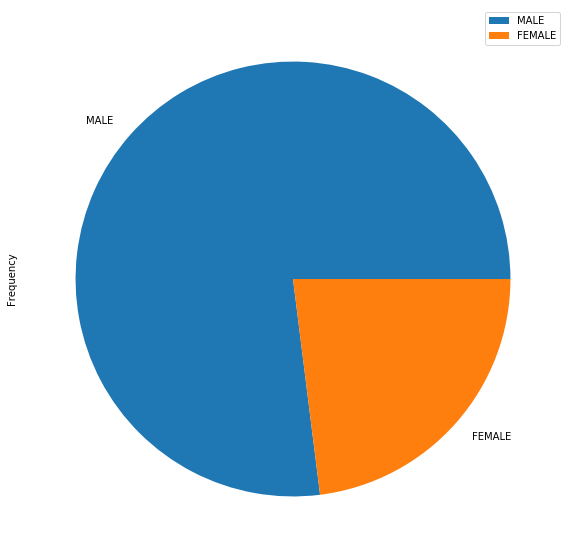

In [9]:
d_male=df1.loc[df1['gender'] == 1]
d_female=df1.loc[df1['gender'] == 2]
df1234 = pd.DataFrame([d_male.shape[0], d_female.shape[0]], index=['MALE', 'FEMALE'], columns=['Frequency'])
df1234.plot(kind='pie', subplots=True, figsize=(10, 10))

## Most of the users lie in the age buckets of 25 to 35 years

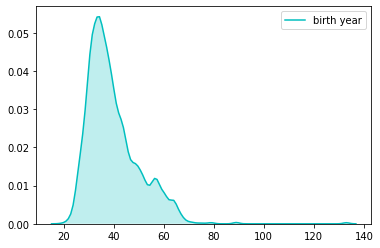

In [10]:

birthyear = df1['birth year']
#birthyear = birthyear.dropna()

birthyear = pd.to_numeric(birthyear, errors='coerce')

age_bucket =  datetime.datetime.now().year - birthyear
p1 = sns.kdeplot(data = age_bucket, shade=True, color="c")

#plt.figure(figsize=(45,20))


## Only 5 % of the users use the bike for more than 30 mins 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24ccdb90>],
      dtype=object)

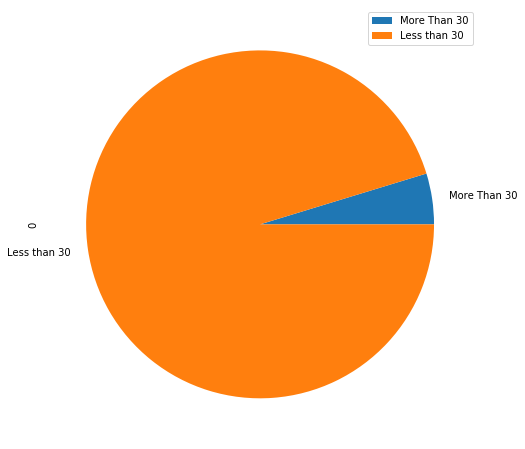

In [11]:

df1['trip_minutes']=df1['tripduration']/60
df_greater=df1[df1.trip_minutes > 30]
df_lesser=df1[df1.trip_minutes < 30]
df123 = pd.DataFrame([df_greater.shape[0], df_lesser.shape[0]], index=['More Than 30', 'Less than 30'])
df123.plot(kind='pie', subplots=True, figsize=(8, 8))

## More number of pickups are on the weekdays than on weekends 

There were a total of 35472 Bike pickups made


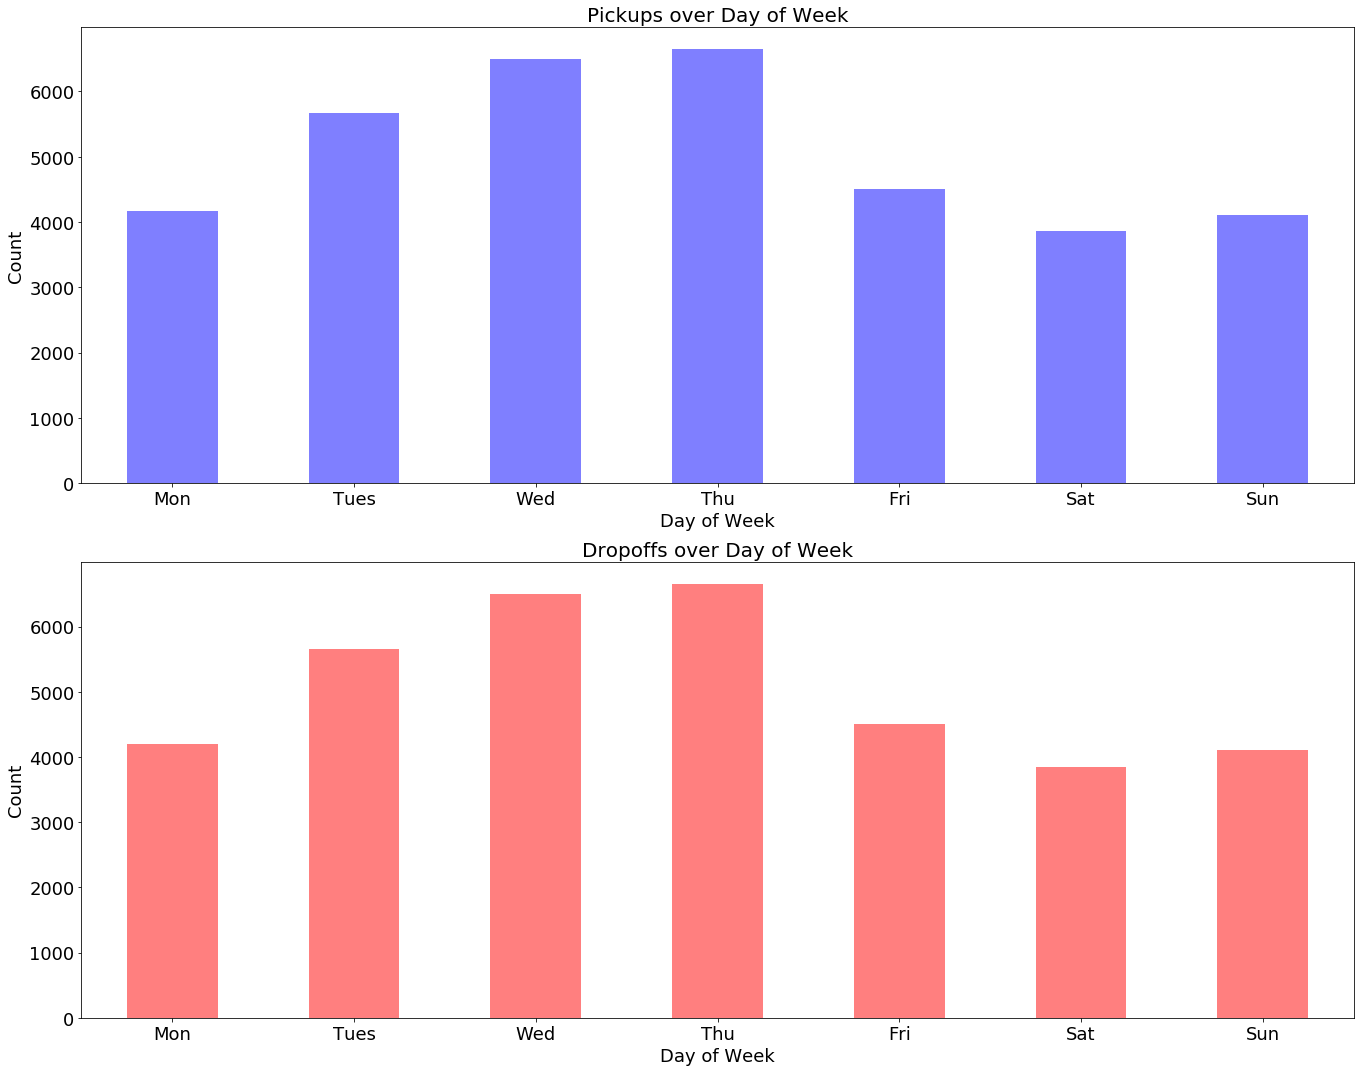

In [12]:
x_tick_labels_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
x_tick_labels_day = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# define subplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(19, 15))

figure = plt.subplot(2, 1, 1)
dow_usage_start.plot.bar(alpha = 0.5, color = 'b')
plt.title('Pickups over Day of Week', fontsize = 20)
plt.xlabel('Day of Week', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(dow_usage_start.index, x_tick_labels_day, rotation='90', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 1, 2)
dow_usage_stop.plot.bar(alpha = 0.5, color = 'r')
plt.title('Dropoffs over Day of Week', fontsize = 20)
plt.xlabel('Day of Week', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(dow_usage_stop.index, x_tick_labels_day, rotation='90', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

fig.tight_layout()
print ("There were a total of %d Bike pickups made" % (len(df1)))

## Most number of pickups are at 8 A.M. and 6 P.M 

There were a total of 35472 Bike drop-offs made


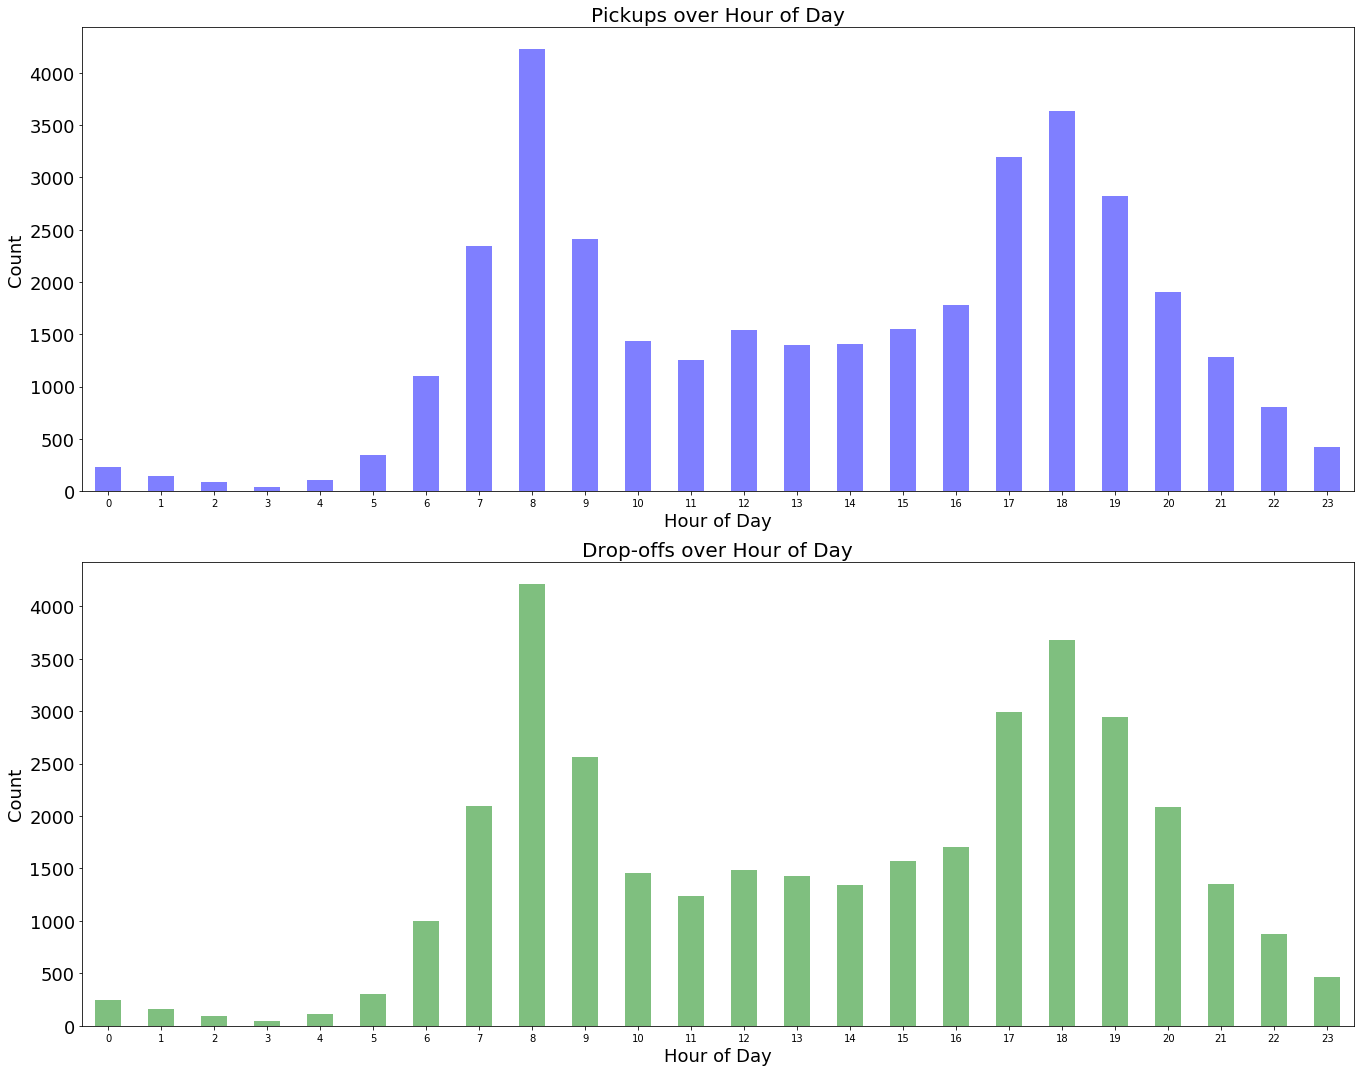

In [13]:
x_tick_labels_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
x_tick_labels_day = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# define subplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(19, 15))
figure = plt.subplot(2,1, 1)
hour_usage_start.plot.bar(alpha = 0.5, color = 'b')
plt.title('Pickups over Hour of Day', fontsize = 20)
plt.xlabel('Hour of Day', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

figure = plt.subplot(2, 1, 2)
hour_usage_stop.plot.bar(alpha = 0.5, color = 'g')
plt.title('Drop-offs over Hour of Day', fontsize = 20)
plt.xlabel('Hour of Day', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation=0)
plt.yticks(fontsize = 18)

fig.tight_layout()
print ("There were a total of %d Bike drop-offs made" % (len(df1)))

In [14]:
d_subs=df1.loc[df1['usertype'] == 'Subscriber']
d_customer=df1.loc[df1['usertype'] == 'Customer']
print('--------------------------------------------------------------------------------------------')
print ("There were %d Customers in the last 20 months who used citibikes " % (d_customer.shape[0]))
print ("There were %d Subscribers in the last 20 months who utilized the citibikes on a daily basis" % (d_subs.shape[0]))
print('--------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------
There were 2470 Customers in the last 20 months who used citibikes 
There were 33002 Subscribers in the last 20 months who utilized the citibikes on a daily basis
--------------------------------------------------------------------------------------------


## Only 7% of the customer base are one time users 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a26eb8a90>],
      dtype=object)

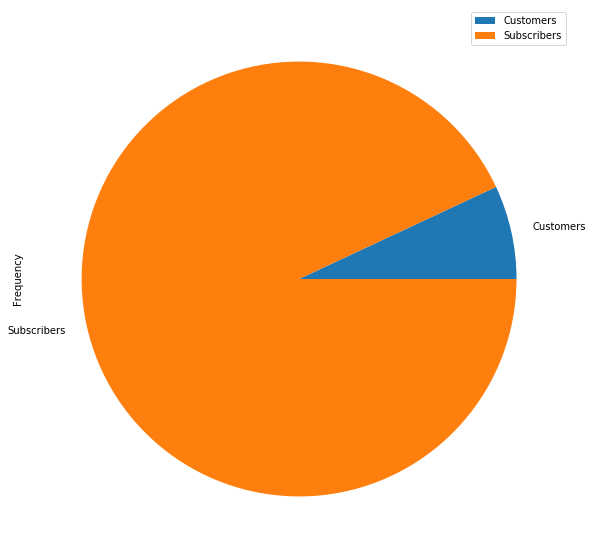

In [15]:
df12345 = pd.DataFrame([d_customer.shape[0], d_subs.shape[0]], index=['Customers', 'Subscribers'], columns=['Frequency'])
df12345.plot(kind='pie', subplots=True, figsize=(10, 10))

## Grove St PATH is the most used bike pickup station for subscribers

In [23]:
df["starttime"] = pd.to_datetime(df["starttime"])

df['starttime_date'] = df['starttime'].dt.date

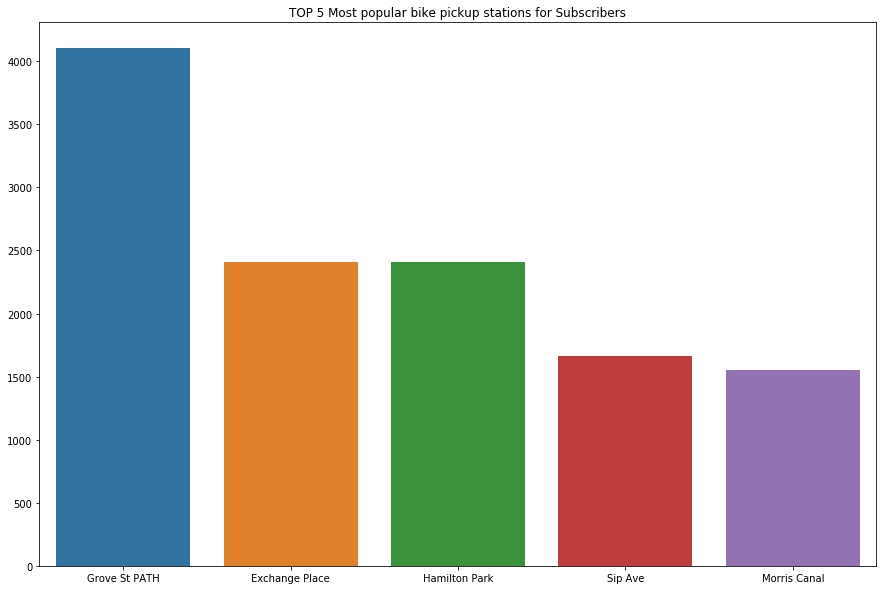

In [37]:
import seaborn as sns
pop_start_stations = df1['start station name'].value_counts().to_dict()
names_start=list(pop_start_stations.keys())
names_start=names_start[0:5]
start_stations=pd.DataFrame.from_dict(pop_start_stations,orient='index',columns=['Frequency'])
vals=list(start_stations['Frequency'])
vals=vals[0:5]

#PLOTTING
plt.figure(figsize= (15,10))
g = sns.barplot(x =names_start , y = vals).set_title('TOP 5 Most popular bike pickup stations for Subscribers')


plt.show()

## Customer's most frequent pickup and drop stations

In [40]:
datC=d_customer.groupby(["start station name","start station latitude","start station longitude", "end station name","end station latitude", "end station longitude"]).size().reset_index(name="frequency")
datC=datC.sort_values(by=['frequency'],ascending=False)[0:10]
datC

,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,frequency
312,Liberty Light Rail,40.711242,-74.055701,Liberty Light Rail,40.711242,-74.055701,179
140,Exchange Place,40.716247,-74.033459,Exchange Place,40.716247,-74.033459,52
489,Newport Pkwy,40.728745,-74.032108,Newport Pkwy,40.728745,-74.032108,51
464,Newport PATH,40.727224,-74.033759,Newport PATH,40.727224,-74.033759,38
156,Exchange Place,40.716247,-74.033459,Newport Pkwy,40.728745,-74.032108,31
416,Morris Canal,40.712419,-74.038526,Morris Canal,40.712419,-74.038526,27
155,Exchange Place,40.716247,-74.033459,Newport PATH,40.727224,-74.033759,24
476,Newport Pkwy,40.728745,-74.032108,Exchange Place,40.716247,-74.033459,23
452,Newport PATH,40.727224,-74.033759,Exchange Place,40.716247,-74.033459,23
307,Liberty Light Rail,40.711242,-74.055701,Exchange Place,40.716247,-74.033459,22


## Subscriber's most frequent pickup and drop locations 

In [42]:
datR=df1.groupby(["start station name","start station latitude","start station longitude", "end station name","end station latitude", "end station longitude"]).size().reset_index(name="frequency")
datR=datR.sort_values(by=['frequency'],ascending=False)[0:10]
datR

,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,frequency
601,Hamilton Park,40.727596,-74.044247,Grove St PATH,40.719586,-74.043117,1033
1089,Morris Canal,40.712419,-74.038526,Exchange Place,40.716247,-74.033459,730
561,Grove St PATH,40.719586,-74.043117,Hamilton Park,40.727596,-74.044247,672
176,Brunswick St,40.724176,-74.050656,Grove St PATH,40.719586,-74.043117,502
502,Exchange Place,40.716247,-74.033459,Morris Canal,40.712419,-74.038526,441
1043,McGinley Square,40.725340,-74.067622,Sip Ave,40.730743,-74.063784,426
1459,Van Vorst Park,40.718489,-74.047727,Grove St PATH,40.719586,-74.043117,423
783,Jersey & 6th St,40.725289,-74.045572,Grove St PATH,40.719586,-74.043117,398
412,Dixon Mills,40.721630,-74.049968,Grove St PATH,40.719586,-74.043117,353
139,Brunswick & 6th,40.726012,-74.050389,Grove St PATH,40.719586,-74.043117,330


In [61]:
subset = df[['start station latitude', 'start station longitude']]
tuples_start = [tuple(x) for x in subset.values]


subset = df[['end station latitude', 'end station longitude']]
tuples_end = [tuple(x) for x in subset.values]

df1 = df.groupby('bikeid')[['tripduration']].sum()
df1.sort_values('tripduration',ascending = False )
bike_route = df.loc[df['bikeid'] == df1['tripduration'].idxmax()]


subset = bike_route[['start station latitude', 'start station longitude']]
tuples_bike_start = [tuple(x) for x in subset.values]

subset = bike_route[['end station latitude', 'end station longitude']]
tuples_bike_end = [tuple(x) for x in subset.values]


distinct_stations_start = df[['start station name','start station latitude','start station longitude']].drop_duplicates()

subset = distinct_stations_start[['start station latitude', 'start station longitude']]
station_markers_start = [tuple(x) for x in subset.values]

distinct_stations_end = df[['end station name','end station latitude','end station longitude']].drop_duplicates()

subset = distinct_stations_end[['end station latitude', 'end station longitude']]
station_markers_end = [tuple(x) for x in subset.values]

## Plotting the top 10 routes for the Subscribers 

In [66]:

import gmaps
import gmaps.datasets

gmaps.configure(api_key=".........................")

datR['start_lat_lon'] = list(zip(datR['start station latitude'], datR['start station longitude']))
datR['end_lat_lon'] = list(zip(datR['end station latitude'], datR['end station longitude']))


fig = gmaps.figure()
for i in range(10):
    geneva2zurich = gmaps.directions_layer(datR['start_lat_lon'].iloc[i], datR['end_lat_lon'].iloc[i])
    fig.add_layer(geneva2zurich)

fig

Figure(layout=FigureLayout(height='420px'))

## Plotting all the pickup stations

In [72]:
fig2 = gmaps.figure()
markers_start = gmaps.marker_layer(station_markers_start)
fig2.add_layer(markers_start)

fig2

Figure(layout=FigureLayout(height='420px'))

## Plotting all the drop down stations

In [73]:
import gmaps
import gmaps.datasets



fig1 = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(tuples_start)

fig1.add_layer(gmaps.heatmap_layer(tuples_end))

markers_end = gmaps.marker_layer(station_markers_end)
fig1.add_layer(markers_end)


fig1

Figure(layout=FigureLayout(height='420px'))

## Creating a boundary for the set of pickup locations

In [70]:
fig = gmaps.figure(center=(40.740, -74.02), zoom_level=11)
london_congestion_zone_polygon = gmaps.Polygon(
    station_markers_start,
    stroke_color='blue',
    fill_color='blue'
)
drawing = gmaps.drawing_layer(
    features=[london_congestion_zone_polygon],
    show_controls=False
)
fig.add_layer(drawing)
fig


Figure(layout=FigureLayout(height='420px'))

## Creating boundary for drop off stations

In [71]:
london_congestion_zone_polygon = gmaps.Polygon(
    station_markers_end,
    stroke_color='red',
    fill_color='red'
)
drawing = gmaps.drawing_layer(
    features=[london_congestion_zone_polygon],
    show_controls=False
)
fig.add_layer(drawing)
fig

Figure(layout=FigureLayout(height='420px'))

## Inference:

Since there are many drop off locations outside of New Jersey (where all of the pickup stations are present), setting up more stations in the Manhattan area will help in increasing Citibike's revenue and customer base and indirect decrease in cost of transportation of bikes back to New Jersey 